# Самостоятельный проект: Принятие решений в бизнесе

# *Описание*
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

# *Этапы работы*
Работа состоит из двух частей:
1) в первой части работы будут проанализированы 9 гипотез по увеличению выручки интернет-магазина с применением фреймворков ICE и RICE
2) во второй части работы будет проведено А/В-тестирование и проанализированы результаты

In [1]:
# импортируем необходимые бибилиотеки
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузим файлы
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypotesis = pd.read_csv('https://????????????/datasets/hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://????????????????/datasets/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://????????????????/datasets/visitors.csv')

In [3]:
# проверим датафреймы
#hypothesis.head(9)

In [4]:
#hypothesis.info()

In [5]:
#orders.head()

In [6]:
#orders.info()

In [7]:
#visitors.head()

In [8]:
#visitors.info()

Данные выгружены корректно. Необходима замена типов данных атрибута date в orders и visitors. В hypothesis также добавим дополнительный столбец с номером гипотезы.

Наименование одной из гипотез некорректное (№4 "Изменить структура категорий..."). Заменим на более правильное. Также можно сократить наименования гипотез для более удобного представления данных в табличном и графическом виде

In [9]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [10]:
short_name = ['2 новых канала', 'Своя доставка', 'Блоки рекомендаций на сайт', 'Новая структура категорий',
       'Новый цвет фона глагне',
       'Страница отзывов',
       'Баннеры с акциями',
       'Подписка',
       'Скидка на ДР']

In [11]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [12]:
hypothesis['hyp_number'] = range(1, len(hypothesis) + 1)
hypothesis.loc[3, 'Hypothesis'] = 'Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
hypothesis['short_name'] = short_name
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,hyp_number,short_name
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,1,2 новых канала
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2,Своя доставка
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,3,Блоки рекомендаций на сайт
3,"Изменить структуру категорий, что увеличит кон...",8,3,3,8,4,Новая структура категорий
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,5,Новый цвет фона глагне
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,6,Страница отзывов
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,7,Баннеры с акциями
7,Добавить форму подписки на все основные страни...,10,7,8,5,8,Подписка
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,9,Скидка на ДР


## Часть 1. Приоритизация гипотез

Рассчитаем параметры ICE и RICE для представленных гипотез, воспользовавшись формулами расчета

In [13]:
# в большинстве случаев значения параметров - целые числа, поэтому к новым атрибутам также применим форматирование до 2-го знака
# и преобразование в тип float, т.к. форматирование превращает в object
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).map('{:,.2f}'.format).astype(float)
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).map('{:,.2f}'.format).astype(float)

In [14]:
#hypothesis

Создадим отдельный датафрейм с расчетами и рагжированием гипотез

In [15]:
ice = hypothesis[['hyp_number','short_name', 'ICE']].sort_values(by='ICE', ascending=False)
rice = hypothesis[['hyp_number','short_name', 'RICE']].sort_values(by='RICE', ascending=False)  
ice['hyp_ice_range'] = range(1, len(ice) + 1)
rice['hyp_rice_range'] = range(1, len(rice) + 1)

In [16]:
ice

,hyp_number,short_name,ICE,hyp_ice_range
8,9,Скидка на ДР,16.20,1
0,1,2 новых канала,13.33,2
7,8,Подписка,11.20,3
6,7,Баннеры с акциями,8.00,4
2,3,Блоки рекомендаций на сайт,7.00,5
1,2,Своя доставка,2.00,6
5,6,Страница отзывов,1.33,7
3,4,Новая структура категорий,1.12,8
4,5,Новый цвет фона глагне,1.00,9


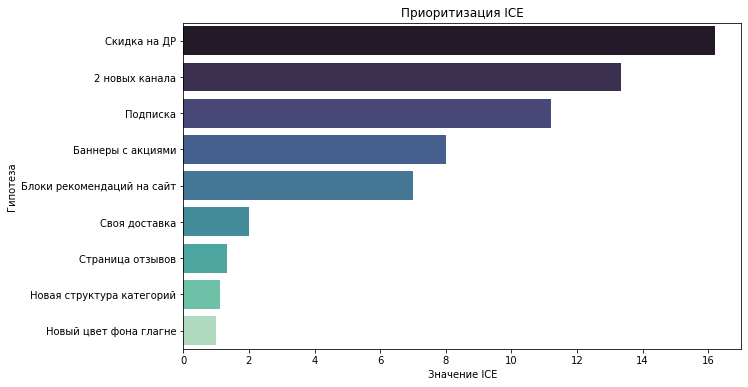

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=ice, y='short_name', x='ICE', palette="mako")
plt.title('Приоритизация ICE')
plt.xlabel('Значение ICE')
plt.ylabel('Гипотеза')
plt.show()

In [18]:
rice

,hyp_number,short_name,RICE,hyp_rice_range
7,8,Подписка,112.0,1
2,3,Блоки рекомендаций на сайт,56.0,2
0,1,2 новых канала,40.0,3
6,7,Баннеры с акциями,40.0,4
8,9,Скидка на ДР,16.2,5
3,4,Новая структура категорий,9.0,6
1,2,Своя доставка,4.0,7
5,6,Страница отзывов,4.0,8
4,5,Новый цвет фона глагне,3.0,9


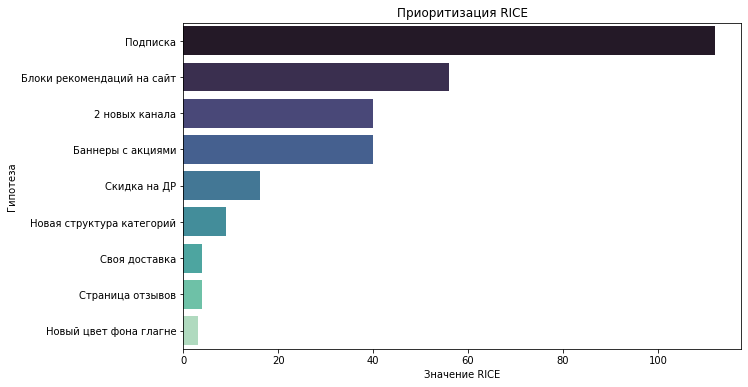

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=rice, y='short_name', x='RICE', palette="mako")
plt.title('Приоритизация RICE')
plt.xlabel('Значение RICE')
plt.ylabel('Гипотеза')
plt.show()

Сравним приоритизацию гипотез в одном датафрейме. Добавим расчетный параметр и изменением рейтинга

In [20]:
comparision = ice.merge(rice, how='left')
comparision['range_delta'] = comparision['hyp_ice_range'] - comparision['hyp_rice_range']
comparision[['short_name', 'hyp_number', 'hyp_ice_range', 'hyp_rice_range', 'range_delta']]

,short_name,hyp_number,hyp_ice_range,hyp_rice_range,range_delta
0,Скидка на ДР,9,1,5,-4
1,2 новых канала,1,2,3,-1
2,Подписка,8,3,1,2
3,Баннеры с акциями,7,4,4,0
4,Блоки рекомендаций на сайт,3,5,2,3
5,Своя доставка,2,6,7,-1
6,Страница отзывов,6,7,8,-1
7,Новая структура категорий,4,8,6,2
8,Новый цвет фона глагне,5,9,9,0


**Как видно из талицы сравнения приоритизации методами ICE и  RICE:**
- не изменился приоритет у гипотез №№ 7 и 5 (4-е и 9 место соответственно)
- больше всего упала в приоритете гипотеза №9 - минус 4 места в рейтинге, т.к. значение параметра Reach для данной гипотезы = 1
- на 1 позицию вниз упали в приоритете гипотезы №№ 1, 2, 6
- на 2-3 позиции выросли в приоритете гипотезы 8, 4 и 3

Попробуем отобразить значения параметров ICE и RICE на графике. В целом можно выделить ряд "зон"/"областей" в зависимости от значений параметров (низкий, средний, высокий):
- ICE < 6, RICE < 20 - низкий приоритет, гипотезы 2, 4, 5, 6
- ICE [6;10], RICE [20; 60] - средний приоритет, гипотезы 3 и 7
- ICE > 10, RICE > 60 - высокий приоритет, гипотеза 8
Отдельно выделяются гипотезы 1 и 9 с высоким значенем параметра ICE, и низким (по сравнению с гипотезой 8) значением параметра RICE

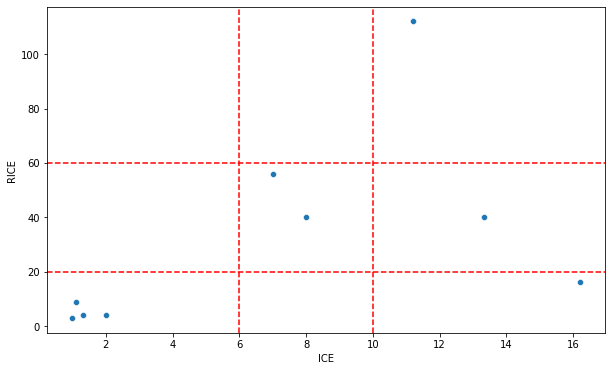

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=hypothesis, x='ICE', y='RICE', legend=True, markers=True)
plt.axhline(y=20, color='red', linestyle='--')
plt.axhline(y=60, color='red', linestyle='--')
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')
plt.show()

Возможно, на графике не хватает подписей, только вот почему-то в бибилиотеках seaborn и и matplotlib нет толком метода и инструмента, который может на графике типа scatterplot обозначить все маркеры. Можно использовать цикл для вставления текста по координатам на графике scatter из библиотеки matplotlib. Для этого необходимо подготовить данные отдельно.

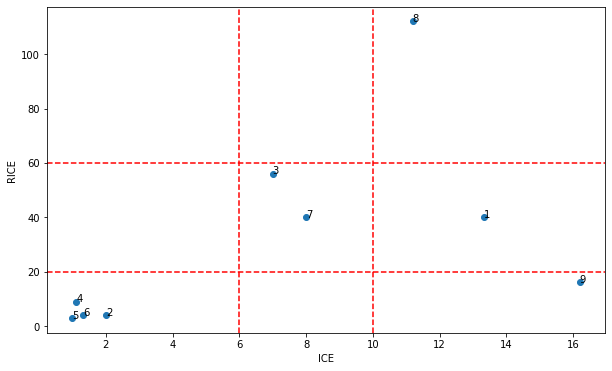

In [22]:
x_list = hypothesis['ICE'].tolist()
y_list = hypothesis['RICE'].tolist()
labels = hypothesis['hyp_number'].tolist()
plt.figure(figsize=(10,6))
plt.scatter(x_list, y_list)

for i, label in enumerate(labels):
    plt.annotate(label, (x_list[i], y_list[i]))

plt.axhline(y=20, color='red', linestyle='--')
plt.axhline(y=60, color='red', linestyle='--')
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.show()

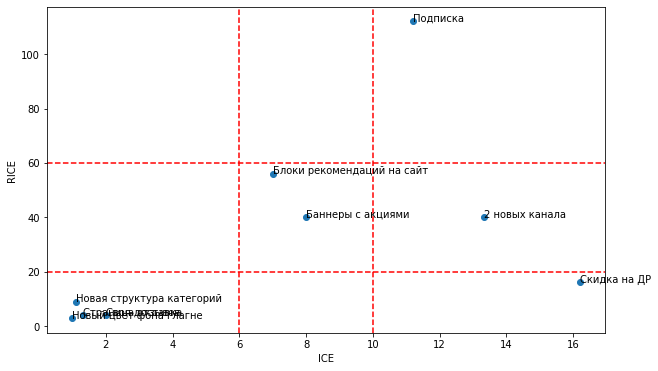

In [23]:
labels_name = hypothesis['short_name'].tolist()
plt.figure(figsize=(10,6))
plt.scatter(x_list, y_list)

for i, label in enumerate(labels_name):
    plt.annotate(label, (x_list[i], y_list[i]))

plt.axhline(y=20, color='red', linestyle='--')
plt.axhline(y=60, color='red', linestyle='--')
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.show()

начинания, связанные со своей доставкой, страницей отзывов, новой структурой категорий и новым цветом фона главной, явно в **пролете**

## Часть 2. Анализ А/В-теста

**Предварительная проверка данных**

1) Проведем проверку данных на нормальность. Рассчитаем  критерий Шапиро-Уилка для значений выручки и количества посетителей. Пусть alpha = 0.05

In [24]:

revenue_data = orders['revenue'].tolist()
visitors_data = visitors['visitors'].tolist()

result_1 = st.shapiro(revenue_data)
p_value_1 = result_1[1]

result_2 = st.shapiro(visitors_data)
p_value_2 = result_2[1]

print('р-значение для выручки:', p_value_1)
print('р-значение для посетителей:', p_value_2)

р-значение для выручки: 0.0
р-значение для посетителей: 0.00202026404440403


Как видно, р-значение намного ниже критического уровеня статистической значимости. Поэтому данные о выручке и количестве посетителей распределены не нормально. Аналогичное ненормальное распеределение внутри групп. А данные точно настоящие?)

In [25]:
revenue_a_data = orders.query('group == "A"')['revenue'].tolist()
revenue_b_data = orders.query('group == "B"')['revenue'].tolist()

#visitors_data = visitors['visitors'].tolist()

result_1 = st.shapiro(revenue_a_data)
p_value_1 = result_1[1]

result_2 = st.shapiro(revenue_b_data)
p_value_2 = result_2[1]

print('р-значение для A:', p_value_1)
print('р-значение для B:', p_value_2)

р-значение для A: 1.739723833199812e-34
р-значение для B: 0.0


2) Найдем значение критерия Манна-Уитни. Можно заключить, что между группами А и В нет какой-то статистически значимой разницы

In [26]:
results = st.mannwhitneyu(revenue_a_data, revenue_b_data, use_continuity=True, alternative='less')
print(results.pvalue)

0.3646454927716229


3) Посмотрим на динамику выручки и посетителей в разрезе групп в целом

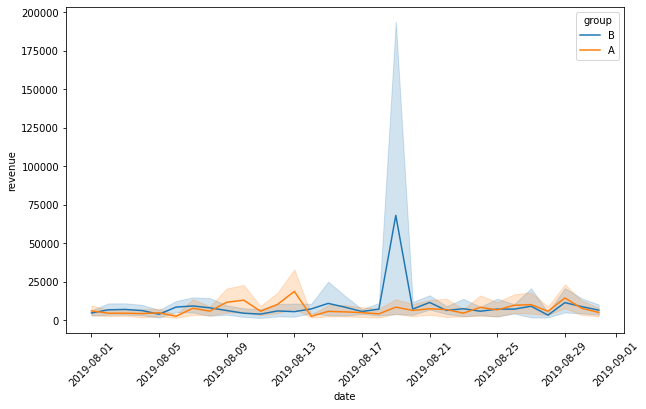

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=orders, x='date', y='revenue', hue='group')
plt.xticks(rotation=45)
plt.show()

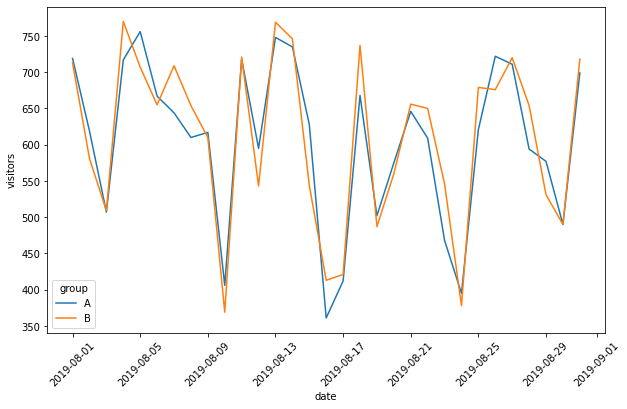

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=visitors, x='date', y='visitors', hue='group')
plt.xticks(rotation=45)
plt.show()

Основываясь на данных графиках динамики выявить особого различия между группами не возможно. Видем вспелск выручки 19 августа 2019 года в группе В.

### График кумулятивной выручки по группам

In [29]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [30]:
#агрегируем данные о выручке по дате и группе - посчитаем уникальное количество покупателей и заказов, а также сумму заказов (выручки)
orders_agg = orders.groupby(['date','group']).agg(
                            {'transactionId':'nunique','visitorId':'nunique','revenue':'sum'}).rename(
                            columns={'transactionId':'orders','visitorId':'buyers'}).reset_index()
#добавим вспомогательный столбец
orders_agg['group_copy'] = orders_agg['group']
orders_agg = orders_agg.set_index(['date','group'])
#посчитаем кумулятивные значения
orders_cumsum = orders_agg.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()
orders_cumsum

,date,group,orders,buyers,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,63,354874
...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398
58,2019-08-30,A,545,531,4022970
59,2019-08-30,B,620,608,5774631
60,2019-08-31,A,557,543,4084803


In [31]:
#аналогично для посетителей без дополнительной агрегации и группировки
visitors_cumsum = visitors.groupby(['date','group']).agg({'visitors':'sum'}).sort_values(['date','group']).reset_index()
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()
visitors_cumsum

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [32]:
#Объединим 2 таблицы с кумулятивными данными
cumulativedata = orders_cumsum.merge(visitors_cumsum, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativedata['revenue_mill'] = (cumulativedata['revenue'] / 1000000).map('{:,.3f}'.format).astype(float)
cumulativedata

,date,group,orders,buyers,revenue,visitors,revenue_mill
0,2019-08-01,A,24,20,148579,719,0.149
1,2019-08-01,B,21,20,101217,713,0.101
2,2019-08-02,A,44,39,242401,1338,0.242
3,2019-08-02,B,45,43,266748,1294,0.267
4,2019-08-03,A,68,63,354874,1845,0.355
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708,5.559
58,2019-08-30,A,545,531,4022970,18037,4.023
59,2019-08-30,B,620,608,5774631,18198,5.775
60,2019-08-31,A,557,543,4084803,18736,4.085


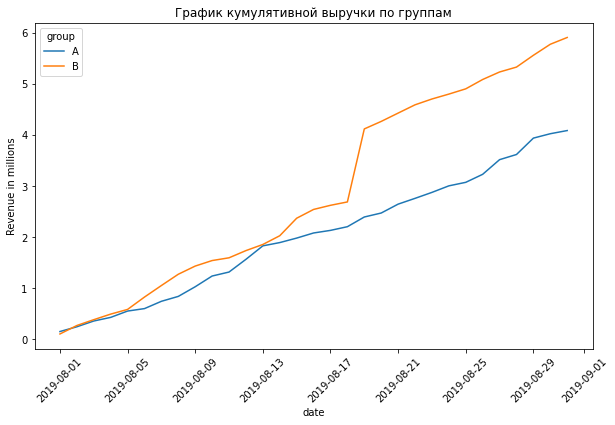

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativedata, x='date', y='revenue_mill', hue='group')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Revenue in millions')
plt.xticks(rotation=45)
plt.show()

По графику кумулятивной выручки видно, что 19 августа 2019 года в группе В произошел резкий скачок выручки (также видно на графике динамики выручки, см. выше). Скорее всего это случайный выброс (ошибка в бд, дописали лишний нолик), т.к. далее кумулятивная выручка растет линейно. *В тоже время 19 августа достигнет максимума метеорный поток Каппа Цигниды - с редкими, но яркими и крупными метеорами. Ну и что-то там с Меркурием в Сатурне...* Возможно это астрономическое событие повлияло на поведение пользователей. 

А что по посетителям? Количество посетителей растет линейно без внезапных всплесков, т.е. наплыва посетителей в данную дату не наблюдалось

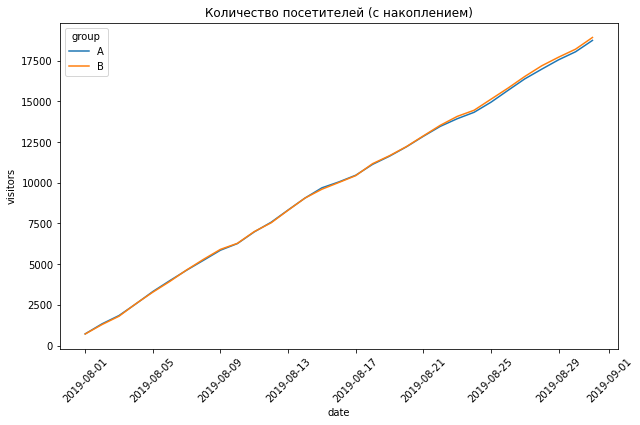

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativedata, x='date', y='visitors', hue='group')
plt.title('Количество посетителей (с накоплением)')
plt.xticks(rotation=45)
plt.show()

#### Проверка "пересекающихся пользователей"

Проверим, попадают ли какие-нибудь пользователи в обе группы. Для этого проанализируем данные orders

In [35]:
v_i = orders.pivot_table(index='visitorId', columns='group', values='transactionId', aggfunc='count').reset_index()

def groups_check(group):
    if group > 0:
        return 1
    else:
        return 0
v_i['AA'] = v_i['A'].apply(groups_check)
v_i['BB'] = v_i['B'].apply(groups_check)

v_i['A+B'] = v_i['AA'] + v_i['BB']
v_i_user_list = v_i.query('A+B > 1')['visitorId'].tolist()

print('Количество пользователей, которые попали в обе группы - ', len(v_i_user_list))


Количество пользователей, которые попали в обе группы -  58


Т.е. в выборки групп А и В попали одинаковые пользователи. По идее на этапе анализа результатов теста по "очищенным" данным нам также необходимо избавиться от таких пользователей

### График кумулятивного среднего чека по группам

Добавим дополнительные параметры

In [36]:
#средний чек
cumulativedata['avg_bill'] = (cumulativedata['revenue'] / cumulativedata['orders'])
#конверсия - посетители в заказы
cumulativedata['conversion'] = (cumulativedata['orders'] / cumulativedata['visitors'])

cumulativedata

,date,group,orders,buyers,revenue,visitors,revenue_mill,avg_bill,conversion
0,2019-08-01,A,24,20,148579,719,0.149,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,0.101,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,0.242,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,0.267,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,0.355,5218.735294,0.036856
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708,5.559,9327.848993,0.033657
58,2019-08-30,A,545,531,4022970,18037,4.023,7381.596330,0.030216
59,2019-08-30,B,620,608,5774631,18198,5.775,9313.920968,0.034070
60,2019-08-31,A,557,543,4084803,18736,4.085,7333.578097,0.029729


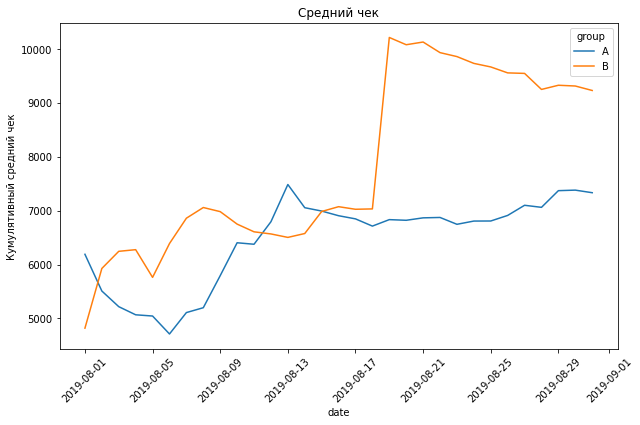

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativedata, x='date', y='avg_bill', hue='group')
plt.title('Средний чек')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=45)

plt.show()

В середине августа кумулятивный средний чек в группе В резко выроз в 1,2 раза, после чего начал снижаться до конца наблюдений.

### График относительного изменения кумулятивного среднего чека группы B к группе A

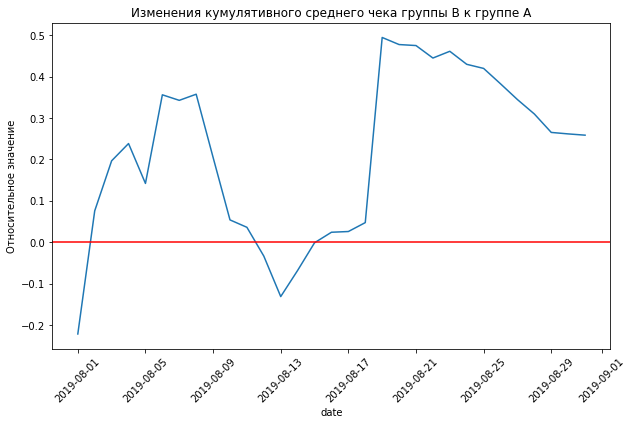

In [38]:
#создадим 2 новых датафрейма с даннымит по каждой группе и объединим их в один общий
cumulativeA = cumulativedata.query('group == "A"')
cumulativeB = cumulativedata.query('group == "B"')

cumulativeA_B = cumulativeA.merge(
                              cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cumulativeA_B['avg_diff_B_A'] = cumulativeA_B['avg_billB'] / cumulativeA_B['avg_billA'] - 1

plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativeA_B, x='date', y='avg_diff_B_A')
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное значение')
plt.xticks(rotation=45)
plt.axhline(y=0, color='red', linestyle='-')

plt.show()


Практически за всю историю наблюдений средний чек в группе В был выше, чем в группе А. Всего 3 раза средние чеки сравнялись. Также виден резкий рост отношения средних чеков 19 августа.

### График кумулятивного среднего количества заказов на посетителя по группам

In [39]:
# посчитаем среднюю конверсию после через неделю 
print(cumulativeA.query('date > "2019-08-07"')['conversion'].mean())
print(cumulativeB.query('date > "2019-08-07"')['conversion'].mean())
print(cumulativedata.query('date > "2019-08-07"')['conversion'].mean())

0.03002538268319994
0.034359199346079984
0.03219229101463996


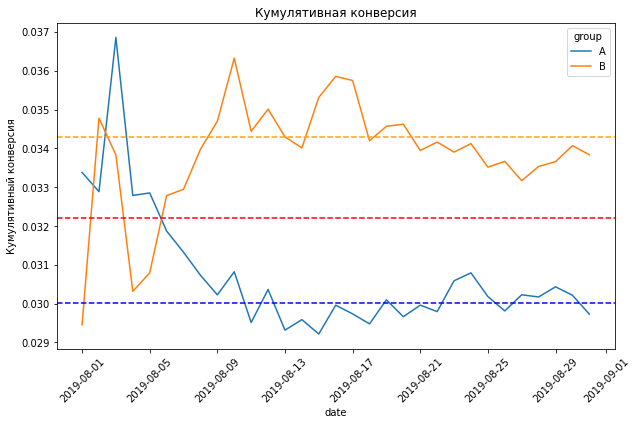

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativedata, x='date', y='conversion', hue='group')
plt.title('Кумулятивная конверсия')
plt.ylabel('Кумулятивный конверсия')
plt.xticks(rotation=45)
plt.axhline(y=0.0322, color='red', linestyle='--')
plt.axhline(y=0.0343, color='orange', linestyle='--')
plt.axhline(y=0.030025, color='blue', linestyle='--')

plt.show()

Примерно после первой недели августа среднее количество заказов на посетителя в обеих группах стабилизируется в окрестности своих медианных значений. Конверсия в группе В лучше

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

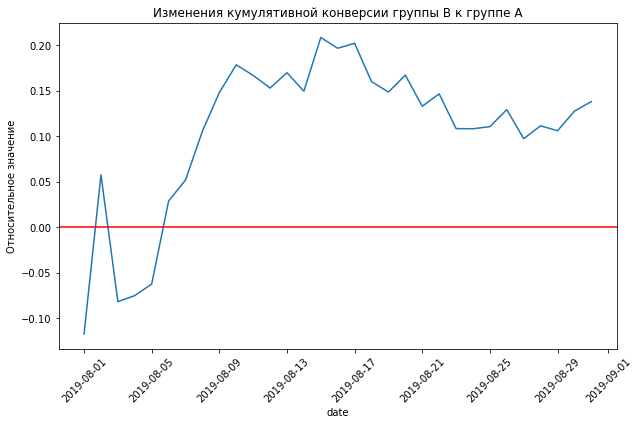

In [41]:
cumulativeA_B['conv_diff_B_A'] = cumulativeA_B['conversionB'] / cumulativeA_B['conversionA'] - 1

plt.figure(figsize=(10,6))
sns.lineplot(data=cumulativeA_B, x='date', y='conv_diff_B_A')
plt.title('Изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Относительное значение')
plt.xticks(rotation=45)
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

За 1 неделю конверсия в группе В становится значительнее лучше, чем в группе А

### Точечный график количества заказов по пользователям

In [42]:
# создадим новый датафрейм с подсчетом заказов на 1-го пользователя
users_orders_count = orders.groupby('visitorId').agg({'transactionId' : 'count'}).rename(columns={'transactionId':'orders'})
users_orders_count = users_orders_count.sort_values(by='orders', ascending=False).reset_index()
#добавим номер по порядку, который соответствует "рейтингу" пользователя по кол-ву заказов
users_orders_count['num'] = range(1, len(users_orders_count) + 1)
users_orders_count['orders'] = users_orders_count['orders'].astype(int)
users_orders_count

,visitorId,orders,num
0,4256040402,11,1
1,2458001652,11,2
2,2378935119,9,3
3,2038680547,8,4
4,199603092,5,5
...,...,...,...
1026,1484903144,1,1027
1027,1485964287,1,1028
1028,1494664757,1,1029
1029,1495112755,1,1030


In [43]:
print(users_orders_count['orders'].sum())

1197


Подсчет корректный, т.к. в исходном наборе данных 1197 записей о заказах. Также был добавлен "рейтинг" пользователя, который будет отображен на оси ординат на точечном графике. Т.о. график будет уже отсортирован и более нагляден

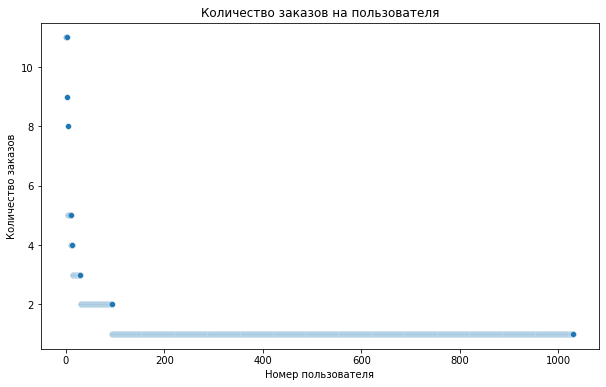

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=users_orders_count, x='num', y='orders')
plt.title('Количество заказов на пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Номер пользователя')

plt.show()

In [45]:
print('Количество пользователей с 2-я и более заказами:', users_orders_count.query('orders >= 2')['visitorId'].count())
print('Количество уникальных пользователей:', users_orders_count['visitorId'].nunique())
print('Доля пользователей с 2-я и более заказами:', (100 * users_orders_count.query('orders >= 2')['visitorId'].count() / users_orders_count['visitorId'].nunique()),'%')

Количество пользователей с 2-я и более заказами: 94
Количество уникальных пользователей: 1031
Доля пользователей с 2-я и более заказами: 9.117361784675072 %


Т.е. только 94 из 1031 пользователя сделали 2 и более заказов. Отобразим отдельно данных пользователей

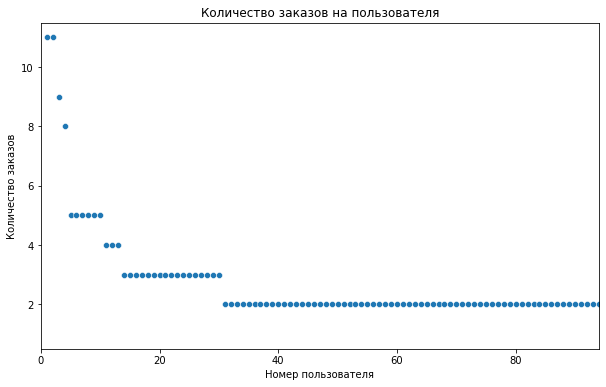

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=users_orders_count, x='num', y='orders')
plt.title('Количество заказов на пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Номер пользователя')
plt.xlim(0,94)

plt.show()

### 95-й и 99-й перцентили количества заказов на пользователя.Граница для определения аномальных пользователей.

In [47]:
#добавим также 91-й персентиль
print(np.percentile(users_orders_count['orders'], [91, 95, 99])) 

[2. 2. 4.]


Действительно, около 9% пользователей совершили 2 и более заказов, менее 1% 4 и более заказов. Т.о. границей для определени аномальных пользователей будет 99-й перцентиль или 4 и более заказов на пользователя

### Точечный график стоимостей заказов

In [48]:
#отсортируем заказы по стоимости и пронумеруем по возрастанию
orders_copy = orders.copy(deep=True)
orders_copy = orders_copy.sort_values(by='revenue', ascending=False)
orders_copy['num'] = range(1, len(orders_copy) + 1)
orders_copy

,transactionId,visitorId,date,revenue,group,num
425,590470918,1920142716,2019-08-19,1294500,B,1
1196,3936777065,2108080724,2019-08-15,202740,B,2
858,192721366,1316129916,2019-08-27,93940,A,3
1136,666610489,1307669133,2019-08-13,92550,A,4
744,3668308183,888512513,2019-08-27,86620,B,5
...,...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B,1193
459,863448794,2738601405,2019-08-19,50,B,1194
756,125335873,3423937755,2019-08-30,50,B,1195
584,1126146019,2705308997,2019-08-20,50,A,1196


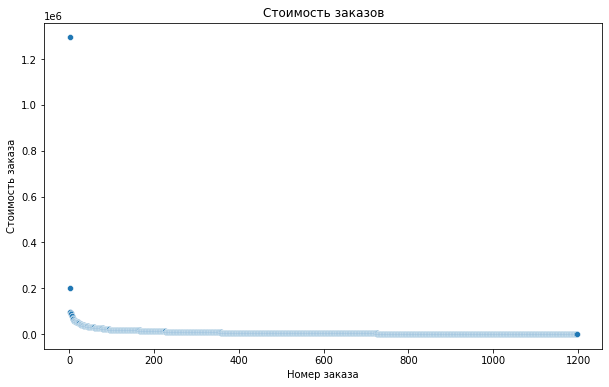

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=orders_copy, x='num', y='revenue')
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер заказа')
#plt.xlim(0,5)

plt.show()

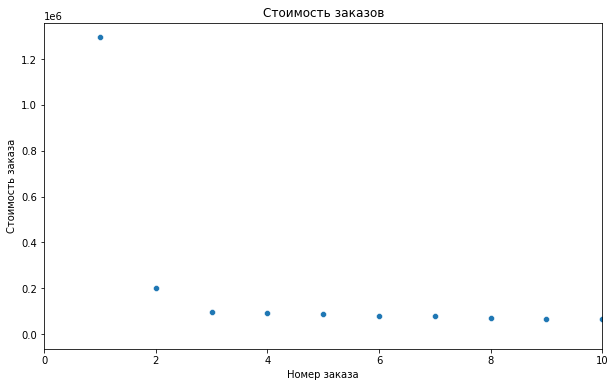

In [50]:
#изменим масштаб
plt.figure(figsize=(10,6))
sns.scatterplot(data=orders_copy, x='num', y='revenue')
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер заказа')
plt.xlim(0,10)

plt.show()

Как видно в наборе данных с заказами есть 1 аномально крупный заказ на 1294500	у.е., который совершен как раз 19 августа. Данный заказ повлиял на характер кривых на графиках выше. Возможно, целесообразно было удалить данный заказ из выборки

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [51]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


In [52]:
print(np.percentile(orders['revenue'], [99.5, 99.7, 99.9])) 

[ 78990.          89063.16       181415.20000001]


На мой взгляд, заказы под номерами 2-5 (10) нельзя считать какими-то аномальными, поэтому верхней границей для определения аномальности по стоимость примем что-то в районе 180 тыс. у.е.

Но для "чистоты эксперимента" дальнейшие оценки также проведем для значений ниже 99-й перцентиля, т.е. 58223

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Воспользуемся данными, которые собрали в датафрейме cumulativeA_B, и применим к ним критерий Манна-Уитни.

Сформулируем гипотезы:
- H0: Конверсия в группе A не превосходит конверсию в группе B, отсутствует статитсическая разница
- H1: Конверсия в группе В превосходит конверсию в группе А, разница статистически значима

In [53]:
results = st.mannwhitneyu(cumulativeA_B['conversionA'], cumulativeA_B['conversionB'], use_continuity=True, alternative='less')
p_value = results.pvalue
alpha = 0.05
print('p-value = {0:.5f}'.format(p_value))
if (p_value < alpha):
    print('Отвергаем H0: разница статистически значима')
else:
    print('Не отвергаем H0: вывод о различии сделать нельзя')

p-value = 0.00000
Отвергаем H0: разница статистически значима


In [54]:
print('Средняя конверсия в группе А: {0:.3f}'.format(cumulativeA_B['conversionA'].mean()))
print('Средняя конвесрия в группе B: {0:.3f}'.format(cumulativeA_B['conversionB'].mean()))

Средняя конверсия в группе А: 0.031
Средняя конвесрия в группе B: 0.034


Т.о. разница статистически значима, средняя конверсия в группе В больше в 1,1 раза

 C другой стороны выше критерий применяется к кумулятивным значениям и рассчитаны кумулятивные средние. Проведем аналогичный расчет для исходных данных. 

In [55]:
#сгруппируем ordres по дате и группе с расчетом количества заказов
df1 = orders.groupby(['date', 'group']).agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}).reset_index()
#сгруппируем orders по дате и группе с расчетом суммы выручки
df2 = orders.groupby(['date', 'group']).agg({'revenue':'sum'}).reset_index()
#объединим сгруппированный денные и visitors_c
df_raw = df1.merge(df2,left_on=['date', 'group'], right_on=['date', 'group'], how='left').merge(visitors, left_on=['date', 'group'], right_on=['date', 'group'], how='left')
# добавим новые столбцы
df_raw['avg_bill'] = df_raw['revenue'] / df_raw['orders']
df_raw['conversion'] = df_raw['orders'] / df_raw['visitors']

Напишем функцию для поиска статистической разницы

In [56]:
def diff(data_A, data_B):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_A, data_B, use_continuity=True, alternative='less')[1]
    print('P-value: {0:.3f}'.format(p_value))

    if (p_value < alpha):
        print('Отвергаем H0: разница статистически значима')
    else:
        print('Не не отвергаем H0: вывод о различии сделать нельзя')

Применим функцию для конверсий

In [57]:
diff(df_raw.query('group == "A"')['conversion'], df_raw.query('group == "B"')['conversion'])

P-value: 0.043
Отвергаем H0: разница статистически значима


Т.е. предыдущий вывод повторился

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

В процессе предварительного анализа данных статистическая значимость различий в среднем чеке заказа по сырым данным была найдена.
Для этого использовался критерий Манна-Уитни.

Сформулируем гипотезы:
- H0: Средний чек A **не превосходит** средний чек группы B, отсутствует статистическая разница
- H1: Средний чек В **превосходит** средний чек группы А, разница статистически значима

In [58]:
# повторим алгоритм, использованный в начале части 2 (в прошлый раз значения были переведены в список)
# сформируем набор со значениями выручки для каждой группы
revenue_a_data = orders.query('group == "A"')['revenue']
revenue_b_data = orders.query('group == "B"')['revenue']
results = st.mannwhitneyu(revenue_a_data, revenue_b_data, use_continuity=True, alternative='less')
p_value = results.pvalue
alpha = 0.05
print('P-value = {0:.3f}'.format(p_value))
if (p_value < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Hе отвергаем H0: вывод о различии сделать нельзя")

P-value = 0.365
Hе отвергаем H0: вывод о различии сделать нельзя


In [59]:
print('Средний чек в группе А: {0:.1f}'.format(revenue_a_data.mean()))
print('Средний чек в группе B: {0:.1f}'.format(revenue_b_data.mean()))

Средний чек в группе А: 7333.6
Средний чек в группе B: 9230.9


Т.о. какая-либо статитически значимая разница средних чеков отсутствует, с другой стороны средний чек в группе В больше практичеки на 1900 у.е. 1

Как мы помним, 19 августа что-то случилось и в выборку группы В попал черезчур странный заказ, сумма которого на порядок выше. Посчитаем средний чек в группе В без одного супераномального заказа 

In [60]:
print('Средний чек в группе В без аномалии:' , orders.query('group == "B" and date != "2019-08-19"')['revenue'].mean())
print('Отличие в средних чеках:', abs(orders.query('group == "B" and date != "2019-08-19"')['revenue'].mean() / 
                                      orders.query('group == "A"')['revenue'].mean() - 1))

Средний чек в группе В без аномалии: 7233.990306946688
Отличие в средних чеках: 0.013579699934291756


Т.е. с учетом аномального заказа средний чек в группе В 9230 у.е, без учета - 7233 у.е. Отличие составляет 1,3%, что свидетельствует о том, что  статитически значимая разница средних чеков отсутствует. Т.е. тест Манна-Уитни проведен корректно, даже с учетом аномального заказа.

Возможно, удаление данного заказа необходимо было сделать в самом начале работы.  

### Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Скорее всего предположение о том, что нельзя было использовать кумулятивные значения, - верно. Повторим примененый выше алгоритм для "очистки" с учетом предельных значений. Предарительно убрав из заказов сех пользователей, которые совершили 4 и более заказов.

Сформулируем гипотезы:
- H0: Конверсия в группе A не превосходит конверсию в группе B, отсутствует статитсическая разница
- H1: Конверсия в группе В превосходит конверсию в группе А, разница статистически значима

In [61]:
# добавим в переменные значения 99-го перцентиля для заказов и выручки
vis_marg_value = np.percentile(users_orders_count['orders'], 99)
ord_marg_value = np.percentile(orders['revenue'], 99)

In [62]:
# составим список пользователей, которые совершили менее 4-х заказов
visitors_list = users_orders_count.query('orders < @vis_marg_value')['visitorId']
# оставим в данных с заказами только те заказы, которые совершены пользователями из списка 
orders_c = orders[orders['visitorId'].isin(visitors_list)]

In [63]:
#сгруппируем ordres по дате и группе с расчетом количества заказов
df1_c = orders_c.query('revenue <= @ord_marg_value').groupby(['date', 'group']).agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}).reset_index()
#сгруппируем orders по дате и группе с расчетом суммы выручки
df2_c = orders_c.query('revenue <= @ord_marg_value').groupby(['date', 'group']).agg({'revenue':'sum'}).reset_index()
#объединим сгруппированный денные и visitors
df_clean = df1_c.merge(df2_c,left_on=['date', 'group'], right_on=['date', 'group'], how='left').merge(visitors, left_on=['date', 'group'], right_on=['date', 'group'], how='left')
# добавим новые столбцы
df_clean['avg_bill'] = df_clean['revenue'] / df_clean['orders']
df_clean['conversion'] = df_clean['orders'] / df_clean['visitors']

In [64]:
diff(df_clean.query('group == "A"')['conversion'], df_clean.query('group == "B"')['conversion'])

P-value: 0.019
Отвергаем H0: разница статистически значима


Разница статистически значима, средняя конверсия в группе В больше даже на очищенных данных

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:
- H0: Средний чек A **не превосходит** средний чек группы B, отсутствует статистическая разница
- H1: Средний чек В **превосходит** средний чек группы А, разница статистически значима

In [65]:
diff(df_clean.query('group == "A"')['avg_bill'], df_clean.query('group == "B"')['avg_bill'])

P-value: 0.600
Не не отвергаем H0: вывод о различии сделать нельзя


Получен аналогичный результат, как и на "грязных" данных

### Решение по результатам теста и объясните его. 
**Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Выявдена статистически значимая разница между конверсиями в группах (в группе В больше, чем в А), при этом какой-либо статзначимой разницы между средними чеками нет. Аналогичный результат получен и для оищенных от выбросов и аномальных значений данных (в "чистый" набор также не попали аномальные заказы, которые портили картину при расчете кумулятиных метрик). 
**Т.о. целесообразно зафикисровать победу в группе В и остановить тест**

## Заключительные выводы

По согласованию с отделом маркетинга мы подготовили список гипотез для увеличения выручки. 

**Работа проведена в 2 этапа:** 

1) в первой части работы  проанализированы 9 гипотез по увеличению выручки интернет-магазина с применением фреймворков ICE и RICE 
2) во второй части работы проведено А/В-тестирование и проанализированы результаты

По результатам **первого этапа** работы выявлено, что в результате сравнения приоритизации методами ICE и RICE:

- не изменился приоритет у гипотез №№ 7 "Баннеры с акциями" и 5 "Новый цвет фона главной" (4-е и 9 место соответственно)
- больше всего упала в приоритете гипотеза №9 "Скидка на ДР" - минус 4 места в рейтинге, т.к. значение параметра Reach для данной гипотезы = 1
- на 1 позицию вниз упали в приоритете гипотезы №№ 1 "2 новых канала", 2 "Своя достака", 6 "Страница отзывов"
- на 2-3 позиции выросли в приоритете гипотезы 8 "Подписка",  4 "Новая структура категорий" и 3 "Блоки рекомендаций на сайт"

В целом можно выделить ряд "зон"/"областей" в зависимости от значений параметров (низкий, средний, высокий):

- ICE < 6, RICE < 20 - низкий приоритет, гипотезы 2, 4, 5, 6, связанные со своей доставкой, новой структрурой категорий, новым цветом фона, страницей отзывов
- ICE [6;10], RICE [20; 60] - средний приоритет, гипотезы 3 и 7, связанные с блоками рекомендаций и баннерными акциями
- ICE > 10, RICE > 60 - высокий приоритет, гипотеза 8 с подпиской, затрагивающая наибольшее кол-во пользователей

Отдельно выделяются гипотезы 1 (2 новых канала) и 9 (Скидка на ДР) с высоким значенем параметра ICE, и низким (по сравнению с гипотезой 8) значением параметра RICE

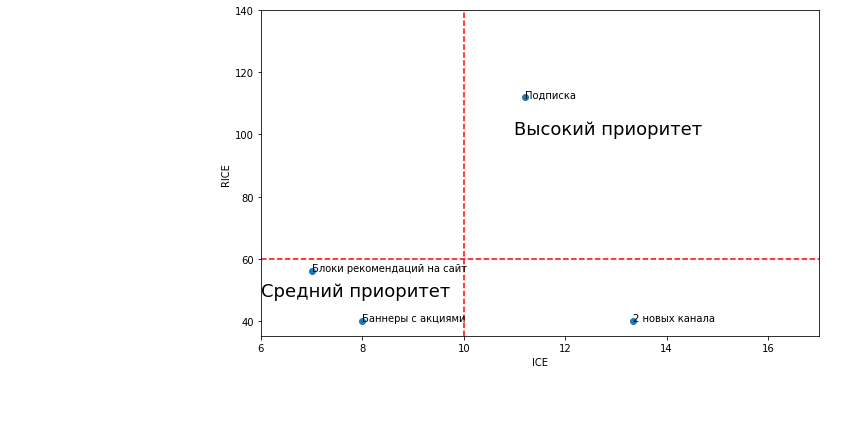

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x_list, y_list)

for i, label in enumerate(labels_name):
    plt.annotate(label, (x_list[i], y_list[i]))

plt.axhline(y=60, color='red', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')
plt.xlim(6,17)
plt.ylim(35,140)
plt.xlabel('ICE')
plt.ylabel('RICE')

plt.text(6, 48, 'Средний приоритет', fontsize=18)
plt.text(11, 100, 'Высокий приоритет', fontsize=18)

plt.show()

2) Во второй части проведе А/В-тест и проанализированы его результаты:
- выявлены ряд аномальных значений, которые скорее всего связаны м ошибкой в БД, впоследствии аномальные значения были удалены
- куммулятивная конверсия в группах растет линейно, в группе В она выше, аналогично с кумулятивным средним чеком
- кумулятивное количество заказов в группе В выше
- выявлена статистически значимая разница конверсии в группах (в группе В выше), в т.ч. при анализе очищенных данных

Предложено остановить тест и зафикисровать победу в группе В